In [1]:
import pandas as pd 
import numpy as np
import os
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
from plotutils import plot_data, plot_surface
import numpy as np

In [2]:
df = pd.read_csv('digit-recognition/digit-recognition/train.csv')
df2 = pd.read_csv('digit-recognition/digit-recognition/test.csv')

In [3]:
#turn the training dataframe into numpy array 
label_data_train = df.to_numpy()

#column vector for the labels (38000,)
label_train = label_data_train[:,0] 

#( 38000 x 784 matrix for the training data  )
data_train = label_data_train[:, 1:] 
print(label_train.shape)
print(data_train.shape)

#turn testing dataframe into numpy array 
label_data_test = df2.to_numpy()
label_test = label_data_test[:,0]
data_test = label_data_test[:,1:]


(38000,)
(38000, 784)


In [4]:
#performs feature extraction 
#code taken from https://medium.com/@basu369victor/handwritten-digits-recognition-d3d383431845
#images aren't all same length so don't need to worry about scaling
import matplotlib.pyplot as plt
from skimage.feature import hog
list_hog = []
list_hog1 = []
for feature in data_train:
    fd = hog(feature.reshape((28,28)), orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=False ) #can probably optimize this
    list_hog.append(fd) #4x4 seems to be optimal 
hog_features_train = np.array(list_hog, 'float64')

#on testing data 
for feature in data_test:
    fd = hog(feature.reshape((28,28)), orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=False )
    list_hog1.append(fd)
hog_features_test = np.array(list_hog1, 'float64')


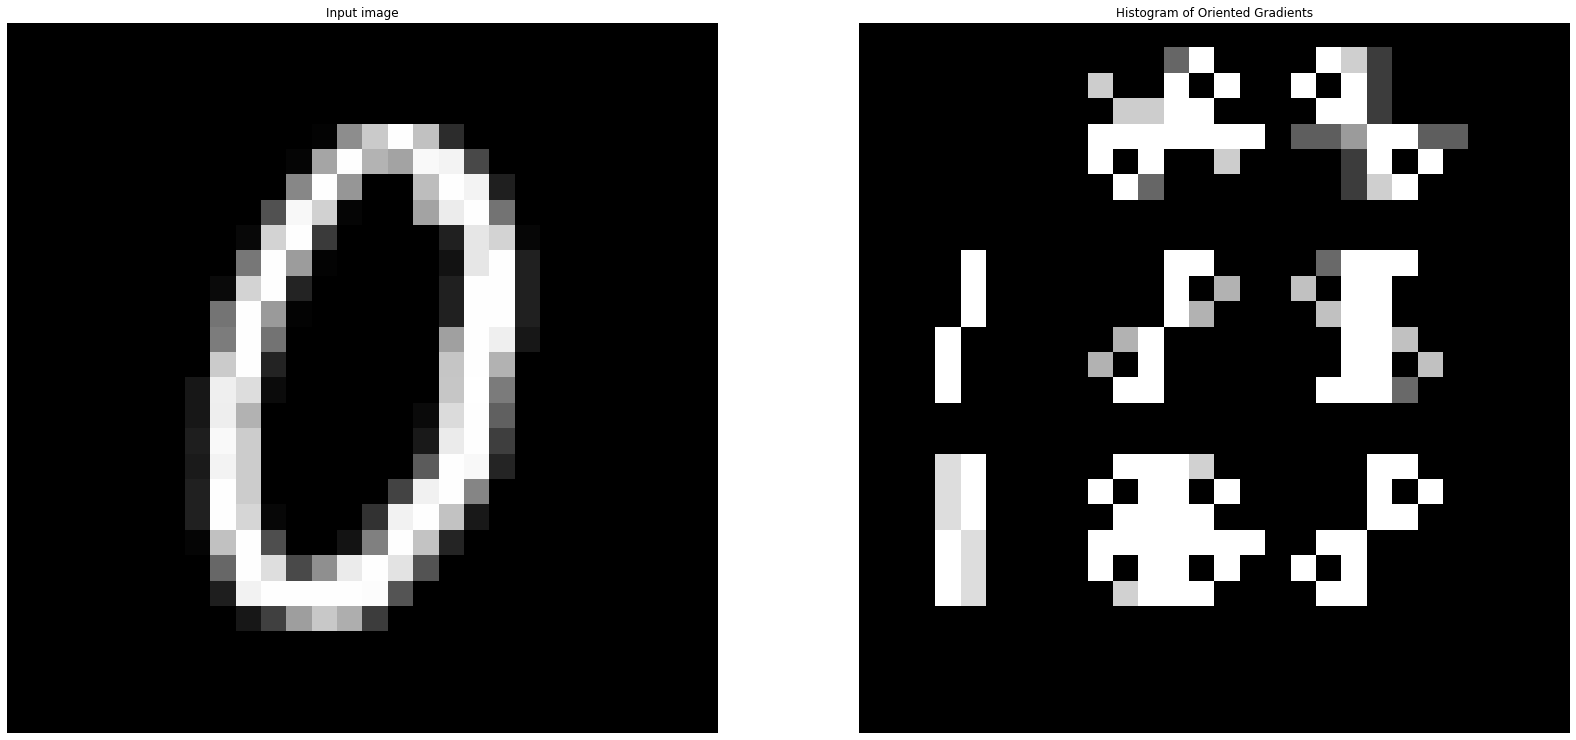

In [10]:
#hog visualization 
#code taken from https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html
import matplotlib.pyplot as plt

image = data_test[5,:].reshape((28,28)) #can do this for multiple images 

fd = hog(image, orientations=9, pixels_per_cell=(4, 4),
                    cells_per_block=(3, 3), visualize=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 28), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()